<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/Data-Mining/blob/main/Data%20Mining%20Assignment%204/Question%202/Car_Prediction_AutoViML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Auto ViML
I have used Auto ViML on a car price prediction Dataset. 
The dataset consists of:
- car_ID	
- symboling	
- CarName	
- fueltype	
- aspiration	
- doornumber	
- carbody	
- drivewheel	
- enginelocation	
- wheelbase	
- carlength	
- carwidth	
- carheight	
- curbweight	
- enginetype	
- cylindernumber	
- enginesize	
- fuelsystem	
- boreratio	
- stroke	
- compressionratio	
- horsepower	
- peakrpm	
- citympg	
- highwaympg	
- price (target)

Here SULOV is used to removed correlated features. XGBoost is used for feature selection and model training. The suitable models are evaulated to determine the best model for this dataset. The most important features are then selected in the model to predict the Car price, and the regression metrics are determined. 

In [1]:
!pip install autoviml
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 5.3 MB/s 
     |████████████████████████████████| 216 kB 49.1 MB/s 
     |████████████████████████████████| 255.9 MB 45 kB/s 
     |████████████████████████████████| 268 kB 57.7 MB/s 
     |████████████████████████████████| 569 kB 55.3 MB/s 
     |████████████████████████████████| 76.8 MB 1.2 MB/s 
     |████████████████████████████████| 125 kB 44.1 MB/s 
     |████████████████████████████████| 11.2 MB 40.9 MB/s 
     |████████████████████████████████| 965 kB 56.8 MB/s 
     |████████████████████████████████| 1.6 MB 50.9 MB/s 
     |████████████████████████████████| 120 kB 58.3 MB/s 
     |████████████████████████████████| 82 kB 876 kB/s 
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=e642f12de8cf7743ea98cfc480088bf46a08ec7978cd45a8c22502e3fa0b67d2
  Stored in directory: /root/.cache/pip/wheels/77/75/99/51

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 3.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are i

In [13]:
from autoviml.Auto_ViML import Auto_ViML

In [14]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Dhanasree-Rajamani/Data-Mining/main/Data%20Mining%20Assignment%204/Dataset/CarPrice_Assignment.csv")
target = 'price'

In [15]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"13,495.00"
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"16,500.00"
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,"16,500.00"
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,"13,950.00"
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,"17,450.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.10,188.80,68.90,55.50,2952,ohc,four,141,mpfi,3.78,3.15,9.50,114,5400,23,28,"16,845.00"
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.10,188.80,68.80,55.50,3049,ohc,four,141,mpfi,3.78,3.15,8.70,160,5300,19,25,"19,045.00"
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.10,188.80,68.90,55.50,3012,ohcv,six,173,mpfi,3.58,2.87,8.80,134,5500,18,23,"21,485.00"
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.10,188.80,68.90,55.50,3217,ohc,six,145,idi,3.01,3.40,23.00,106,4800,26,27,"22,470.00"


In [16]:
num = int(0.9 *df.shape[0])
train = df[:num]
print(train.shape)
test = df[num:]
print(test.shape)

(184, 26)
(21, 26)


In [17]:
sample_submission = ''
scoring_parameter = 'balanced-accuracy'

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (184, 26)
    Training Set Memory Usage = 0.04 MB
Test Set Shape = (21, 26)
    Test Set Memory Usage = 0.00 MB
Single_Label Target: ['price']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  7
    Number of Integer-Categorical Columns =  7
    Number of String-Categorical Columns =  5
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  4
    Number of Numeric-Boolean

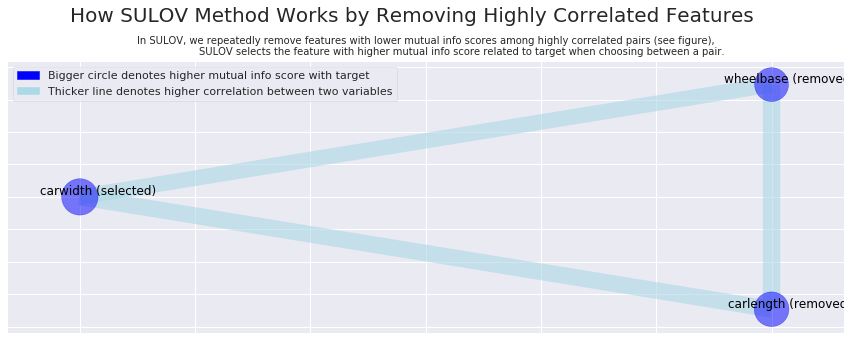

Splitting selected features into float and categorical (integer) variables:
    (5) float variables ...
    (17) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 22 
    Finding Important Features using Boosted Trees algorithm...
        using 22 variables...
        using 18 variables...
        using 14 variables...
        using 10 variables...
        using 6 variables...
        using 2 variables...
Found 16 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  165 , CV rows =  19
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data

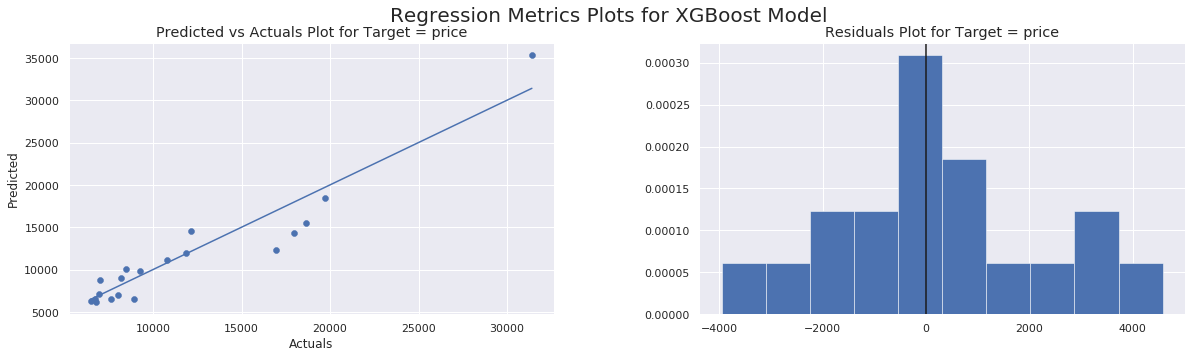

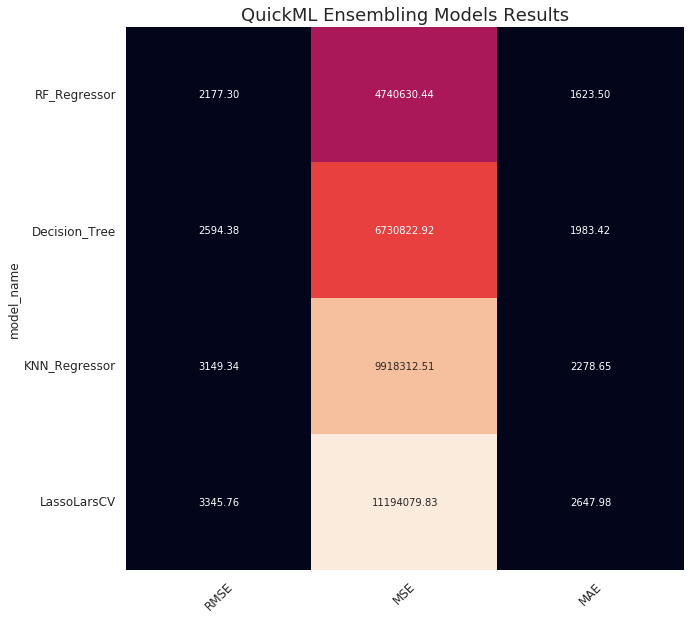

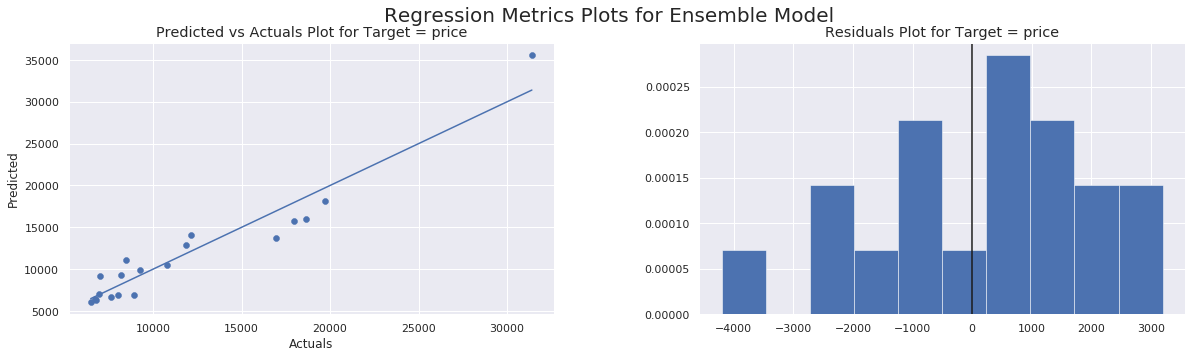

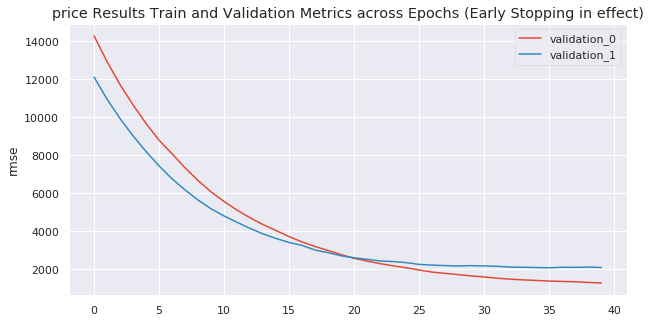

    Time taken for this Target (in seconds) = 206
    Binning_Flag set to False or there are no float vars in data set to be binned
Performing MinMax scaling of train and test data...
###########################################################################
#####   F I N A L I Z I N G   M O D E L   O N    F U L L   T R A I N  #####
###########################################################################
     Actual Training time taken in seconds = 0
Training of models completed. Now starting predictions on test data...
    Calculating weighted average ensemble of 5 regressors
Completed Ensemble predictions on held out data
    Plotting Feature Importances to explain the output of model
############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 207
Writing Output files to disk...
    Saving predictions to ./price/price_Regression_test_modified.csv
    Saving predictions to ./price/price_Regression_submission.csv
 

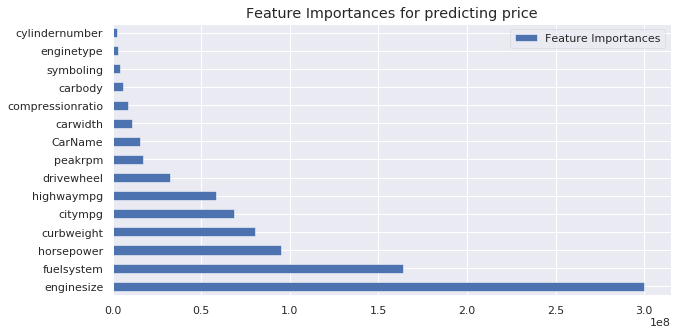

In [18]:
m, feats, trainm, testm = Auto_ViML(train, target, test, sample_submission,
                                    scoring_parameter=scoring_parameter,
                                    hyper_param='GS', feature_reduction=True,
                                    Boosting_Flag=True, Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False,
                                    Imbalanced_Flag=False, verbose=1)